# Create HTML plots with python
* The purpose of this notebook is to demonstrate how to create a series of plots that can be used as part of a static webpage.
* The html figures which you generate will be used in your static webpage
* Source: https://plotly.com/python/linear-fits/

### Take a look at the data

Prior to running the notebook, you may need to install some libraries in your environment. You can read about plotly [here](https://plotly.com/python/getting-started/) but the step is pretty simple: in a new cell, run the following code. ```! conda install plotly```

In [1]:
# ! conda install -c plotly plotly_express  -y
# ! conda install pandas -y
# ! conda install numpy -y

In [2]:
# ! conda install plotly

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [24]:
# import the python libraries

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Create a bar chart

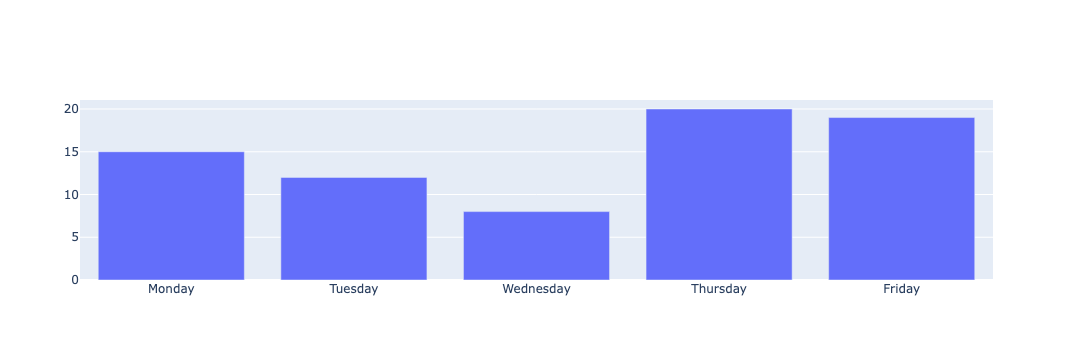

In [25]:
# define some variables
x_values=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
y_values=[15, 12, 8, 20, 19]

# create the data trace
trace =go.Bar(x=x_values, 
              y=y_values,
              # marker={'color':['#FAB303','blue','green', 'red', '#ff5733' ]}
             )

# combine into a figure
fig = go.Figure([trace])
fig

In [27]:
# save your image as an html file
fig.write_html('bar_chart_new.html')

# Pie chart

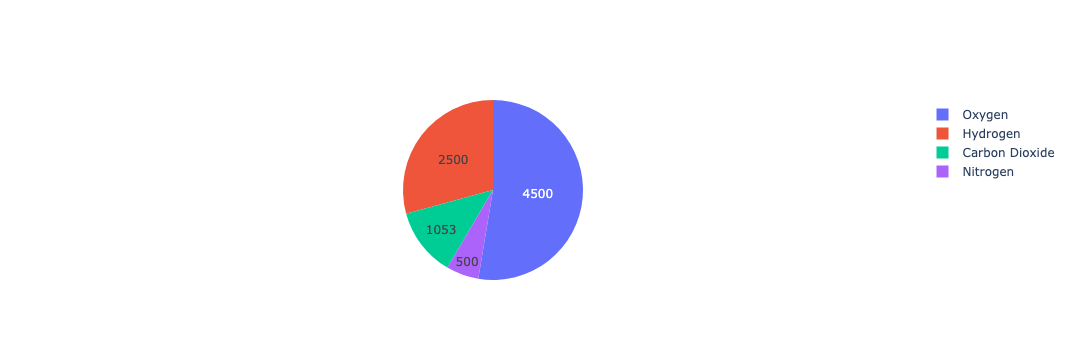

In [28]:
# define some variables
gas = ['Oxygen','Hydrogen','Carbon Dioxide','Nitrogen']
volume = [4500,2500,1053,500]

# create the data trace
trace = go.Pie(labels=gas, 
               values=volume
              )

# combine into a figure
fig = go.Figure([trace])
fig.update_traces(textinfo='value')
fig

In [29]:
# save your image as an html file
fig.write_html('docs/pie_chart.html')

# Line chart

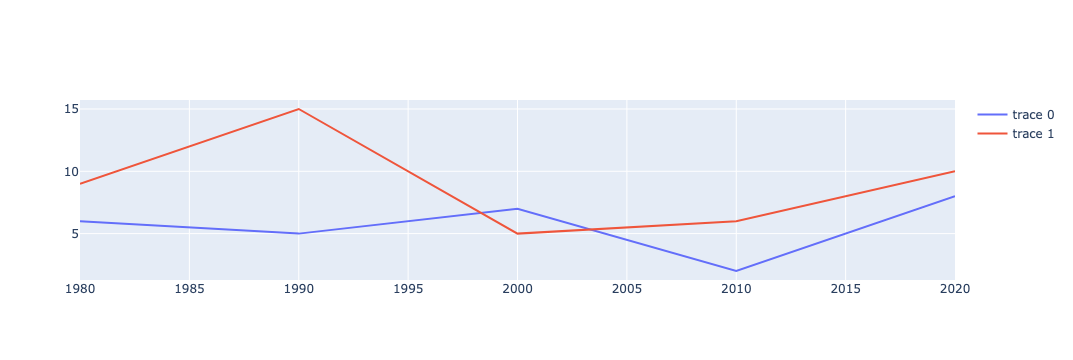

In [8]:
# define some variables
x_values=[1980, 1990, 2000, 2010, 2020]
y1_values=[6, 5, 7, 2, 8]
y2_values=[9, 15, 5, 6, 10]

# create the data trace
trace1 =go.Scatter(x=x_values,
                  y=y1_values,
                  mode = 'lines')
trace2 =go.Scatter(x=x_values,
                  y=y2_values,
                  mode = 'lines')

# combine into a figure
fig = go.Figure([trace1, trace2])
fig

# Scatterplot

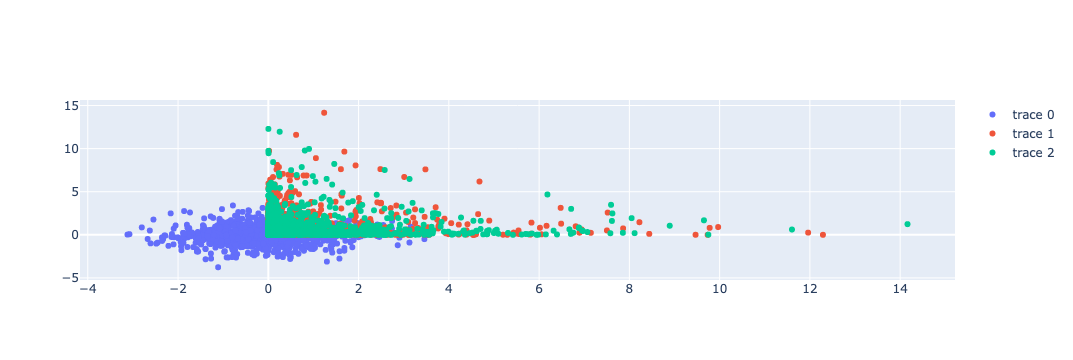

In [9]:
# define some variables
random_x = np.random.randn(1000)
random_y = np.random.randn(1000)

# Create three data traces
trace1 = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)

trace2 = go.Scatter(
    x = random_x**2,
    y = random_y**2,
    mode = 'markers'
)

trace3 = go.Scatter(
    x = random_y**2,
    y = random_x**2,
    mode = 'markers',
   
)

# combine into a figure
data = [trace1, trace2, trace3]
fig = go.Figure(data)
fig

## Create plots using datasets

In [10]:
# import a dataset about tips at restaurants
df = px.data.tips()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


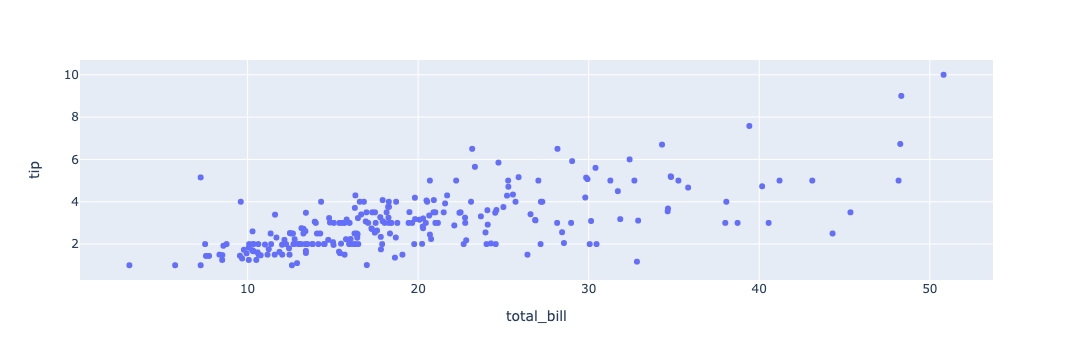

In [11]:
# add changes by removing the # sign
scatter_fig = px.scatter(df, 
                         x='total_bill', 
                         y='tip'
                        )
scatter_fig.show()

In [12]:
# save your figure as an html file
scatter_fig.write_html('docs/scatter_fig.html')

### Add size and color

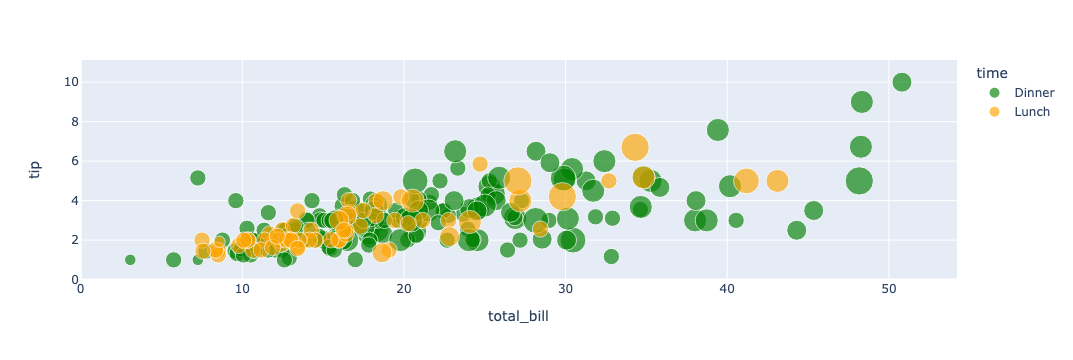

In [13]:
# add changes by removing the # sign
time_fig = px.scatter(df, 
                 x="total_bill", 
                 y="tip", 
                 color='time',
                 opacity=0.65,
                 size='size',
                 color_discrete_sequence=['green', 'orange']
                )
time_fig.show()

In [14]:
# save your figure
time_fig.write_html('docs/bill_fig.html')

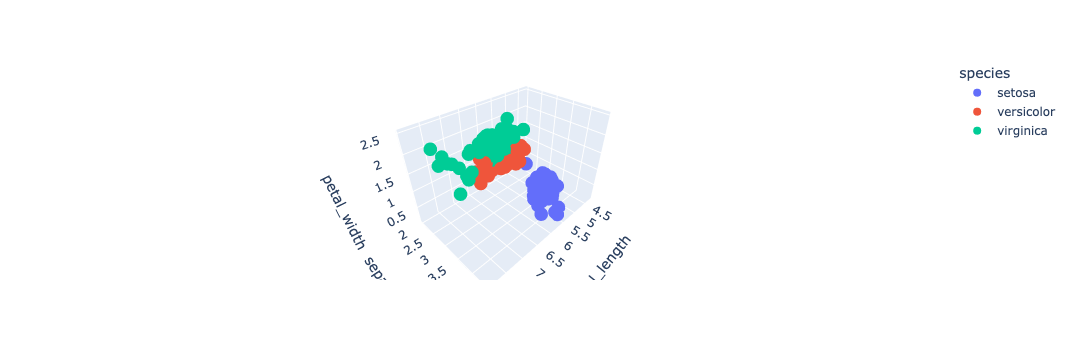

In [15]:
# new dataset
df = px.data.iris()
# create figure
fig = px.scatter_3d(df, 
                    x='sepal_length', 
                    y='sepal_width', 
                    z='petal_width',
                    color='species')
fig

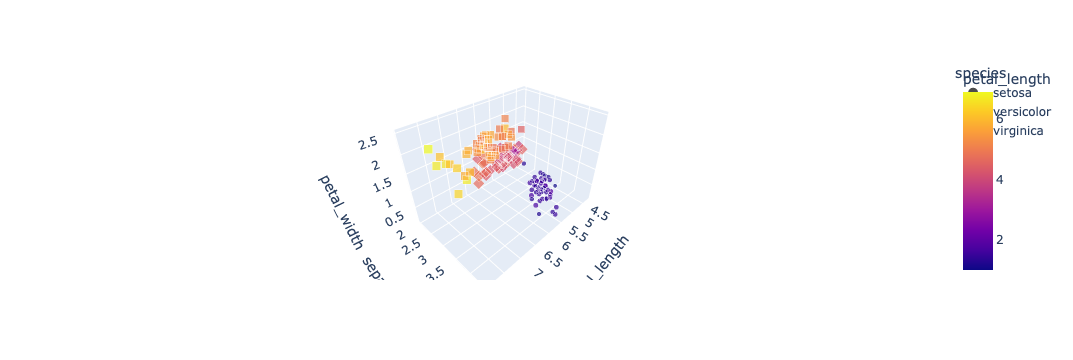

In [16]:
# change colors and symbol
fig = px.scatter_3d(df, 
                    x='sepal_length', 
                    y='sepal_width', 
                    z='petal_width',
                    color='petal_length', 
                    size='petal_length', 
                    size_max=18,
                    symbol='species', 
                    opacity=0.7)
fig

In [17]:
# save your figure
fig.write_html('docs/3d_fig.html')

## Try comparing two groups

In [18]:
# new dataset
wide_df = px.data.medals_wide()
wide_df


,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


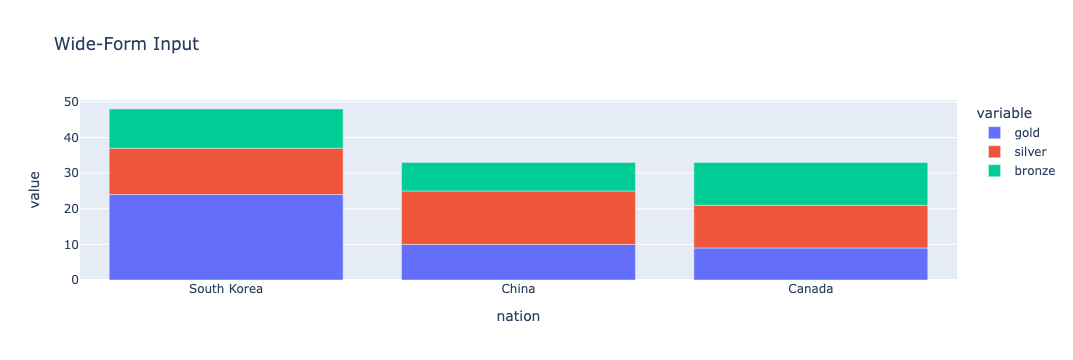

In [19]:
# create figure
fig = px.bar(wide_df, 
             x="nation", 
             y=["gold", "silver", "bronze"], 
             title="Wide-Form Input"
            )
fig.show()

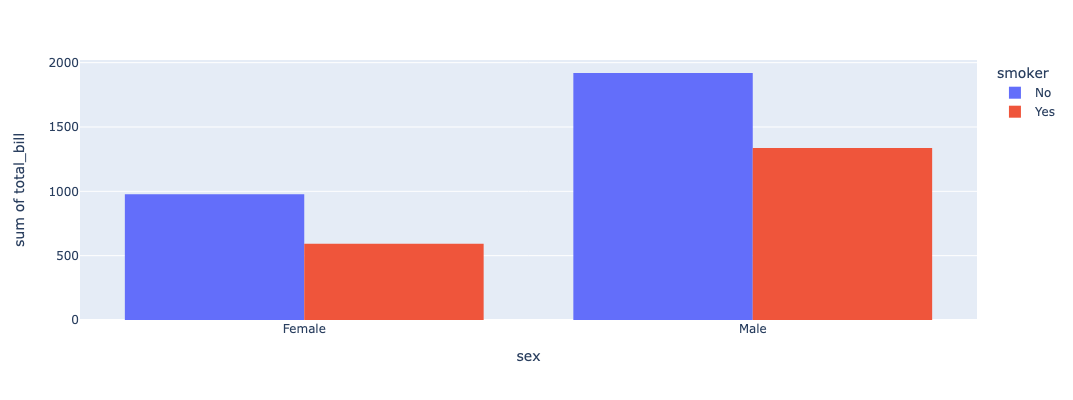

In [20]:
df = px.data.tips()
fig = px.histogram(df, 
                   x="sex", 
                   y="total_bill",
                   color='smoker', 
                   barmode='group',
                   height=400
                  )
fig